<a href="https://colab.research.google.com/github/tjdrms0930/bit2210_bigdata/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

평균, 중간값, 사분위값, 최빈값, 분산, 표준편차, 공분산, 상관계수

In [68]:
import numpy as np

In [139]:
heights = np.random.normal(161.4,4,200) # 평균 161.4, 표준편차 4, 표본 200개 생성
print(heights)
bmis = np.random.normal(21, 2, 200) #평균 21, 표준편차 2, 표본 200개 생성
weights = bmis *(heights**2)/10000 #키와 bmi지수를 이용하여 몸무게 200개 생성
print(weights)

[160.67191666 157.38647713 157.65231156 157.6229176  158.489915
 169.66194455 161.94424517 162.20725546 166.48301962 157.38610186
 158.47064876 158.80803155 158.25791425 168.33892473 159.61538456
 156.44031869 160.23285421 158.75944292 157.03280934 163.65942765
 153.62183887 162.45572489 167.55501464 170.98829227 167.62483348
 160.58926871 160.96437495 165.94080667 165.43917417 157.74631722
 152.48296427 159.54907875 167.91283054 161.09640093 155.82186914
 158.28000679 164.19452308 163.29165386 160.31019276 162.13917102
 160.04406587 160.83075077 155.60381629 156.109134   158.55639031
 158.97526356 157.11103091 163.58181612 163.55668978 166.19529575
 161.09263864 158.6264486  157.61209579 152.32552015 162.2543604
 156.33976922 165.25478746 163.47337406 163.76010451 165.92472476
 160.96370415 161.16733553 158.02993603 158.38821758 159.46973874
 163.49819138 160.34166528 162.81202073 162.29529648 159.91120404
 171.98967596 161.93316097 164.64039147 153.1341851  160.08636768
 162.54179598

In [154]:
print("=====키=====")
print("평균 :", heights.mean())
print("중간값 :", np.median(heights))
print("1/4분위값:", np.quantile(heights, 0.25))
print("2/4분위값:", np.quantile(heights, 0.5))
print("3/4분위값:", np.quantile(heights, 0.75))
hist,bins = np.histogram(heights,bins=[x/2 for x in range(145*2, 180*2, 5)])
print(hist)
print(bins)
artart = hist.argmax()
aend = artart + 1
print(f"최빈 구간: {bins[artart]} ~ {bins[aend]}, 개수 :{hist.max()}")


=====키=====
평균 : 160.90482115341825
중간값 : 160.96403955158854
1/4분위값: 158.27957091234828
2/4분위값: 160.96403955158854
3/4분위값: 163.1647532900506
[ 0  1  2  8 23 49 57 26 20 10  4  0  0]
[145.  147.5 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5
 175.  177.5]
최빈 구간: 160.0 ~ 162.5, 개수 :57


In [153]:
print("{0:02d} {1} {2}".format(12,34,55))
a=12
b=34
c=55
print(f"{a:05x} {b} {c}")

12 34 55
0000c 34 55


In [155]:
cv = np.cov(heights, weights)
print("공분산(키,     키    ):", cv[0,0])
print("공분산(키,     몸무게):", cv[0,1])
print("공분산(몸무게,     키):", cv[1,0])
print("공분산(몸무게, 몸무게):", cv[1,1])

공분산(키,     키    ): 15.634655886180754
공분산(키,     몸무게): 11.277908488102566
공분산(몸무게,     키): 11.277908488102566
공분산(몸무게, 몸무게): 36.69830686483495


In [156]:
std_h = heights.std()
std_w = weights.std()
print("상관계수(키, 몸무게):", np.cov(heights, weights)[0,1]/(std_h*std_w))

상관계수(키, 몸무게): 0.4731929963898677


In [157]:
def correl(x,y):
  std_x = x.std()
  std_y = y.std()
  if std_x>0 and std_y>0:
    return np.cov(x,y)[0,1]/(std_x*std_y)

In [158]:
print("상관계수(키, 몸무게):", correl(heights, weights))

상관계수(키, 몸무게): 0.4731929963898677


#**확률과 통계**
독립사건, 정규 분포, 중심극한정리

In [ ]:
#P(A) : 사건 A가 발생할 확률
#P(B) : 사건 B가 발생할 확률
#P(A|B) : 사건 B가 발생한 상태에서 사건 A가 발생할 확률
#P(A abd B) : 사건 A와 사건 B가 모두 발생할 확률
#만약 사건 A와 사건 B가 서로 영향을 주지 않으면 독립 사건이라 한다.
#P(A|B) = P(A) 일 때 사건 A와 사건 B는 독립 사건이다.
#A와 B가 독립사건일 때 P(A and B) = P(A)*P(B) 공식이 성립한다.

In [1]:
import math

In [3]:
pa = 1/2 #동전을 던져서 앞면이 나올 확률
pb = 1/6 #주사위를 던져서 1면이 나올 확률
pab = pa*pb
print(pab)
logit_pab = math.log(pa) + math.log(pb)
inv_logit_pab = math.exp(logit_pab)
print(inv_logit_pab)

0.08333333333333333
0.08333333333333333


https://wikimedia.org/api/rest_v1/media/math/render/svg/9ed7dc1a20c9a4d553eafeca9a327bcef3fa22c4

In [16]:
#균등분포 : 사건이 발생할 확률이 모두 같게 분포
def uniform_pdf(x,min_y=0,max_v=1):
  if(min_y<=x<=max_v):
    return 1/(max_v-min_y+1)
  return 0

In [17]:
print(uniform_pdf(1,1,6)) #1에서 6사이로 구성한 균등 분포에서 1이 나올 확률
print(uniform_pdf(2,1,6)) #1에서 6사이로 구성한 균등 분포에서 2이 나올 확률
print(uniform_pdf(3,1,6)) #1에서 6사이로 구성한 균등 분포에서 3이 나올 확률
print(uniform_pdf(4,1,6)) #1에서 6사이로 구성한 균등 분포에서 4이 나올 확률
print(uniform_pdf(5,1,6)) #1에서 6사이로 구성한 균등 분포에서 5이 나올 확률
print(uniform_pdf(6,1,6)) #1에서 6사이로 구성한 균등 분포에서 6이 나올 확률

0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666


In [30]:
# 누적균등분포 : 균등분포에서 누적값
def uniform_cdf(x, min_v = 0, max_v = 1):
  if x<min_v:
    return 0 
  if min_v<=x<=max_v:
    return (x-min_v+1)/(max_v-min_v+1)
  return 1

In [31]:
print(uniform_cdf(2,1,6)) #1에서 6사이로 구성한 균등 분포에서 2이 나올 확률
print(uniform_cdf(3,1,6)) #1에서 6사이로 구성한 균등 분포에서 3이 나올 확률
print(uniform_cdf(4,1,6)) #1에서 6사이로 구성한 균등 분포에서 4이 나올 확률
print(uniform_cdf(5,1,6)) #1에서 6사이로 구성한 균등 분포에서 5이 나올 확률
print(uniform_cdf(6,1,6)) #1에서 6사이로 구성한 균등 분포에서 6이 나올 확률

0.3333333333333333
0.5
0.6666666666666666
0.8333333333333334
1.0


In [32]:
import matplotlib.pyplot as plt

In [33]:
xs = [x for x in range(-10,10)]
pys = [uniform_pdf(x, 1, 6) for x in xs]
cys = [uniform_cdf(x, 1, 6) for x in xs]
print(xs)
print(pys)
print(cys)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333334, 1.0, 1, 1, 1]


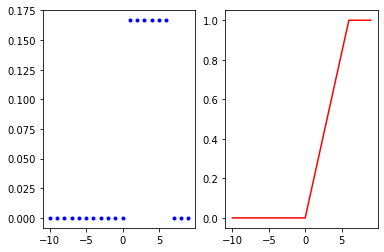

In [34]:
fig,ax = plt.subplots(1,2) #1 X 2 도면을 만들어 주세요.
ax[0].plot(xs,pys,"b.",label="pdf")
ax[1].plot(xs,cys,"r",label="cdf")
plt.show()

In [37]:
#정규분포함수
def normal_pdf(x,mu=0, sigma=1):
  pre = 1/(sigma*math.sqrt(2*math.pi))
  post = math.exp(-((x-mu)**2)/(2*(sigma**2)))
  return pre*post

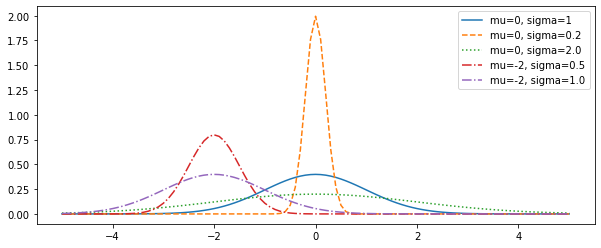

In [46]:
xs = [x/10.0 for x in range(-50,51)]
ys1=[normal_pdf(x) for x in xs]
ys2=[normal_pdf(x, sigma=0.2) for x in xs]
ys3=[normal_pdf(x, sigma=2.0) for x in xs]
ys4=[normal_pdf(x, mu=-2, sigma=0.5) for x in xs]
ys5=[normal_pdf(x, mu=-2, sigma=1.0) for x in xs]
plt.figure(figsize=(10,4))
plt.plot(xs,ys1, '-', label='mu=0, sigma=1')
plt.plot(xs,ys2, '--', label='mu=0, sigma=0.2')
plt.plot(xs,ys3, ':', label='mu=0, sigma=2.0')
plt.plot(xs,ys4, '-.', label='mu=-2, sigma=0.5')
plt.plot(xs,ys5, '-.', label='mu=-2, sigma=1.0')
plt.legend()
plt.show()

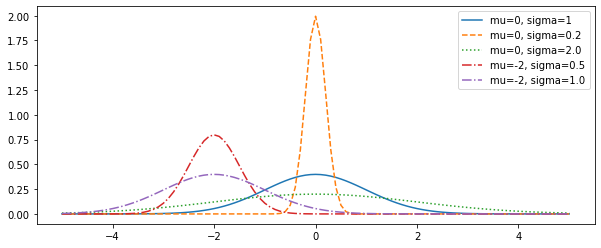

In [47]:
import scipy.stats as st
xs = [x/10.0 for x in range(-50,51)]
ys1 = [st.norm.pdf(x) for x in xs]
ys2=[st.norm.pdf(x, scale=0.2) for x in xs]
ys3=[st.norm.pdf(x, scale=2.0) for x in xs]
ys4=[st.norm.pdf(x, loc=-2, scale=0.5) for x in xs]
ys5=[st.norm.pdf(x, loc=-2, scale=1.0) for x in xs]
plt.figure(figsize=(10,4))
plt.plot(xs,ys1, '-', label='mu=0, sigma=1')
plt.plot(xs,ys2, '--', label='mu=0, sigma=0.2')
plt.plot(xs,ys3, ':', label='mu=0, sigma=2.0')
plt.plot(xs,ys4, '-.', label='mu=-2, sigma=0.5')
plt.plot(xs,ys5, '-.', label='mu=-2, sigma=1.0')
plt.legend()
plt.show()

In [48]:
def normal_cdf(x, mu=0, sigma=1): # 정규누적분포
  return ( 1+(math.erf( (x-mu) / (math.sqrt(2) * sigma) )))/2

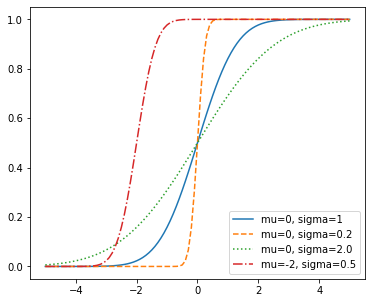

In [51]:
xs = [x/10.0 for x in range(-50,51)]
ys1=[normal_cdf(x) for x in xs]
ys2=[normal_cdf(x, sigma=0.2) for x in xs]
ys3=[normal_cdf(x, sigma=2.0) for x in xs]
ys4=[normal_cdf(x, mu=-2, sigma=0.5) for x in xs]
plt.figure(figsize=(6,5))
plt.plot(xs,ys1, '-', label='mu=0, sigma=1')
plt.plot(xs,ys2, '--', label='mu=0, sigma=0.2')
plt.plot(xs,ys3, ':', label='mu=0, sigma=2.0')
plt.plot(xs,ys4, '-.', label='mu=-2, sigma=0.5')
plt.legend()
plt.show()

In [65]:
def ber_trial(p):
  return 1 if np.random.random()<p else 0
  # 베르누이

In [70]:
cnt =0
for _ in range(120):
  re = ber_trial(1/6)
  print(re,end=' ')
  if re ==1:
    cnt+=1
print()
print(cnt)

0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 
28


In [62]:
def ber(n,p):
  return sum(ber_trial(p) for _ in range(n))

In [69]:
for _ in range(20):
  print(ber(120, 1/6),end='.')
  print()

19.
22.
15.
21.
20.
21.
16.
17.
21.
20.
20.
19.
20.
20.
24.
22.
19.
16.
13.
12.


In [76]:
from collections import Counter
def ber_hist(p,n,nps): #p확률의 사건을 n번 시행하는 실험을 nps번 수행해라
  data=[ ber(n,p) for _ in range(nps) ]
  hist = Counter(data)

  mu = n*p #기대값
  sigma = math.sqrt(n*p*(1-p)) #표준편차

  xs = range(min(data),max(data),1)
  ys = [normal_pdf(i,mu,sigma) for i in xs]
  plt.bar(hist.keys(),[v/nps for v in hist.values()],color='r')
  plt.plot(xs,ys)
  plt.title("ber histogram")
  plt.show()
  return data

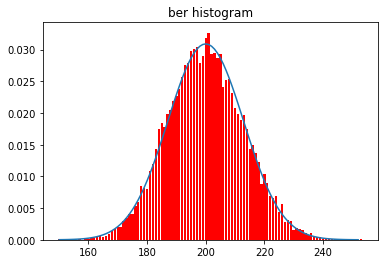

In [77]:
data = ber_hist(1/6, 1200, 12000)